In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import summarytools
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv("Downloads//Heart_disease_cleveland_new.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [7]:
summarytools.dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 54.4 (9.0)min < med < max:29.0 < 56.0 < 77.0IQR (CV) : 13.0 (6.0),41 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABWElEQVR4nO3asW3DMBBGYSYwoObSykWaQAskC2SITMA2a2kCT5E90qSIajUCBCgTBCZNiTrrf1/NgsCDDpZ1D8uyBBzf494XQB2nvS/gXdu2H2Z2Tjk7juPvMAyXre90C0JfYWbnGONPytm+75+3vs+tGN0iJJ/onHE8z/NrCCHpifZMMnTmOH7f+j41MLpFEFoEoUUQWgShRRBaBKFFEFoEoUUQWgShRUj+172VaZreuq77TD1f8/s1oVfUNM1T6seSEOp+v2Z0iyC0CNejO3Nf68XMvlPOHmWZIIfr0LkLAjHGr9SzZTe7P4xuEdWfaMV9LQ+qh1bc1/KA0S2C0CIILYLQIggtgtAiCC2C0CIILYLQIggtgtAiCC3C9eLB0eVsjZZujBJ6Rzlbo6Ubo4xuEas80WyN+LdKaLZG/GN0iyC0CEKL4PXqTpS+c/8bml/SvpS+c/8BI4RvF86RUX0AAAAASUVORK5CYII="">",0(0.0%)
2,sex[int64],1. 12. 0,206 (68.0%)97 (32.0%),,0(0.0%)
3,cp[int64],1. 32. 23. 14. 0,144 (47.5%)86 (28.4%)50 (16.5%)23 (7.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAABBCAYAAADfY/omAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABEUlEQVR4nO3ZsQnDMBQG4SikVCtcZKpMoNk0QaZKEdfunREMQdLz4fsmEBz8Br+07/tNTPfoB+h/xgNLpZRXznmJfkhP27Z913V9R79jtEfOeam1fqIf0lNr7Rn9hhmcTTDjgRkPzHhgxgMzHpjxwIwHZjww44H5bxMsec/jcjbBwmfzKhM3QvhJ6CrnmxGcTTDjgRkPzHhgxgMzHpjxwIwHZjww44EZD8wf02De88CcTbBus+n8zdftnuddbj5nE8x4YMYDMx6Y8cCMB2Y8MOOBGQ/MeGD+2wTzJATmbIIZD+zwm+e37LwO73ne6c7L2QQzHpjxwIwHZjww44EZD8x4YMYDMx6Y/zbBvOeBOZtgPzN6YEM/CJwlAAAAAElFTkSuQmCC"">",0(0.0%)
4,trestbps[int64],Mean (sd) : 131.7 (17.6)min < med < max:94.0 < 130.0 < 200.0IQR (CV) : 20.0 (7.5),50 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABS0lEQVR4nO3cMQ6CMBiG4WpMWOqKg1svoBfwBE6egNUzsXECT+UgMwsJCZ4A5TdQsN/7zAxN3thfauOm73uH9G2XXgDi2C29gE/yPL957w9jnm2a5lXX9WPuNf2rVYf23h+KoniOebaqquPc6/lnbN0iCC2C0CKiz2jLF6yu607OuVEzGp9FD238gnWZez0q2LpFEFoEoUUQWgShRaz6CNSibdtzCOE+5lnFc/FkQmdZtudcfBhbtwhCiyC0CEKLILQIQosgtIhJ3qP5jXn9JgnNb8zrx9YtgtAiCC2C0CIILYLQIggtIpmLBxaKt1EkQyveRmHrFkFoEYQWQWgRhBZBaBGEFiH5Hm2RyuEKob9I5XCFrVvE4CeaC39pGQzNhT87yzx3Lu5MZ0ZPyDLPnYs705nRIvhELyjmqxuhF2TZ6suyvIYQfv5L6zcYbn9SKcvbwAAAAABJRU5ErkJggg=="">",0(0.0%)
5,chol[int64],Mean (sd) : 246.7 (51.8)min < med < max:126.0 < 241.0 < 564.0IQR (CV) : 64.0 (4.8),152 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABLUlEQVR4nO3cMWqEQBhAYRMWtJi0bpHOC2wukEPsCabda3mCdLlRiljbCII5wcoMqJF576sHHHgwiL/6sixLpfK9/vcGdIzL0Rds2/YeQrimrB3H8XcYhq+990RweOgQwjXG+JOytu/79733Q+HRDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQm0yvckaP8zzfqqpKml5pO5uEzhw9fm5xTeU5fB6dY5qmj67rHilrfUlh3alD13X95ksK2/BmDMLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhTj29yuFIc10xoR1prvPohjA0hKEhDA1haAhDQxgawtAQhoZ4+mTM76nK8jS031OVxaMbopihxl5K+RsxMnTOSLNpmluM8Ttl7ZmnYn/E91CVSVLzqQAAAABJRU5ErkJggg=="">",0(0.0%)
6,fbs[int64],1. 02. 1,258 (85.1%)45 (14.9%),,0(0.0%)
7,restecg[int64],1. 02. 23. 1,151 (49.8%)148 (48.8%)4 (1.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAAAwCAYAAAAfHSRCAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAAA4klEQVR4nO3ZsQnDMBBA0VNwqVa4yFSewLN5gkyVwq7VOzsYhPiX/yY4+HACXbnvO8RUWmtbrXWdPcgovffzuq7P7DlGWGqt677v39mDjHIcx3v2DKO8Zg+g54wHZjww44EZD8x4YMYDMx6Y8cCMB2Y8MD+mwYonIS7XJljqtZl5ZUYkv+dlvuVFuDbRjAdmPDDjgRkPzHhgxgMzHpjxwIwHZjwwP6bBvOeBuTbBSmtti4jIvF6yWrK+d//AtQlmPDDjgRkPzHhgxgMzHpjxwIwHZjww44Etvfdz9hB6xnse2A8zYjy7MO9WKAAAAABJRU5ErkJggg=="">",0(0.0%)
8,thalach[int64],Mean (sd) : 149.6 (22.9)min < med < max:71.0 < 153.0 < 202.0IQR (CV) : 32.5 (6.5),91 distinct values,"<img src = ""data:image/png;ba

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [476]:
# We can see that all the variables are described as Interger & float values. 
# But we knew few variables are Nominal (Catgorical).

cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
df[cols]=df[cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    category
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(9), float64(1), int64(4)
memory usage: 17.1 KB


In [32]:

from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 303    │ │ category    │ 9     │ │ age                   │                                │
│ │ Number of columns │ 14     │ │ int64       │ 4     │ │ sex                   │                                │
│ └───────────────────┴────────┘ │ float64     │ 1     │ │ cp                    │                                │
│                                └─────────────┴───────┘ │ fbs                   │                                │
│                                                        │ restecg               │                                │
│                                                        │ exang                 │                                │
│                                                        │ slope                 │                                │
│                                                        │ ca                    │                                │
│                                                        │ thal                  │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ trestbps            │     0 │        0 │      130 │     18 │     94 │    120 │    140 │     200 │  ▃▇█▃▁   │  │
│ │ chol                │     0 │        0 │      250 │     52 │    130 │    210 │    280 │     560 │   ▂█▃    │  │
│ │ thalach             │     0 │        0 │      150 │     23 │     71 │    130 │    170 │     200 │   ▂▄██▁  │  │
│ │ oldpeak             │     0 │        0 │        1 │    1.2 │      0 │      0 │    1.6 │     6.2 │   █▃▁▁   │  │
│ │ target              │     0 │        0 │     0.46 │    0.5 │      0 │      0 │      1 │       1 │  █    ▇  │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴────────┴────────┴────────┴─────────┴──────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ age                              │         0 │              0 │ False                 │                 41 │  │
│ │ sex                              │         0 │              0 │ False                 │                  2 │  │
│ │ cp                               │         0 │              0 │ False                 │                  4 │  │
│ │ fbs                              │         0 │              0 │ False                 │                  2 │  │
│ │ restecg                          │         0 │              0 │ False                 │                  3 │  │
│ │ exang                            │         0 │      

DataFrame : 303 X 14

Duplicates : 0

Missing Values : 0


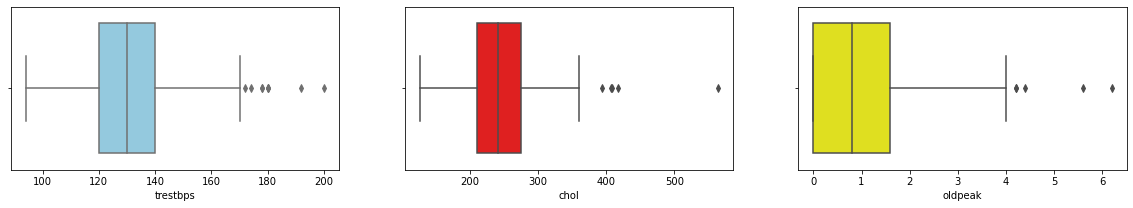

In [35]:
f = plt.figure(figsize=(20,3))
cols = ['trestbps','chol','oldpeak']
colors = ['skyblue','red','yellow']

index = 1
for col in cols:
    ax = f.add_subplot(1,3,index)
    plt.ticklabel_format(style='plain')
    sns.boxplot(ax=ax,data=df,x=col,color=colors[index-1])
    index=index+1


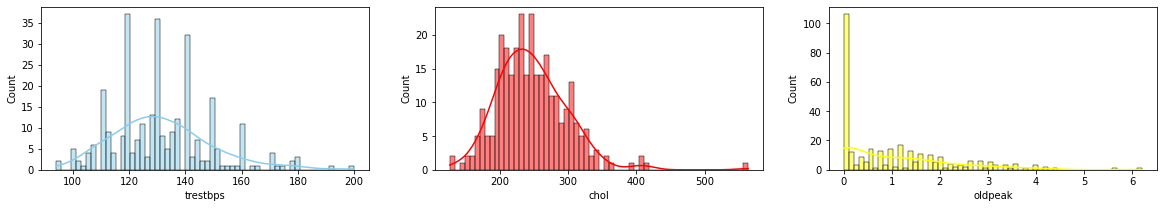

In [43]:

f = plt.figure(figsize=(20,3))
index = 1
for col in cols:
    plt.subplot(1,3,index)
    plt.ticklabel_format(style='plain')
    sns.histplot(df[col],color=colors[index-1],bins = 60,kde=True)
    index=index+1



oldpeak is positively skewed
We observere that 32.67% (99 samples) of datapoints have oldpeak as 0.


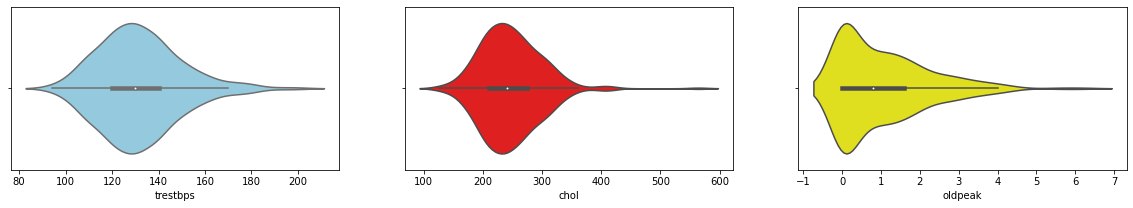

In [42]:
f = plt.figure(figsize=(20,3))
index = 1
for col in cols:
    ax = f.add_subplot(1,3,index)
    plt.ticklabel_format(style='plain')
    sns.violinplot(ax=ax,data=df,x=col,color=colors[index-1])
    index=index+1



In [79]:
cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

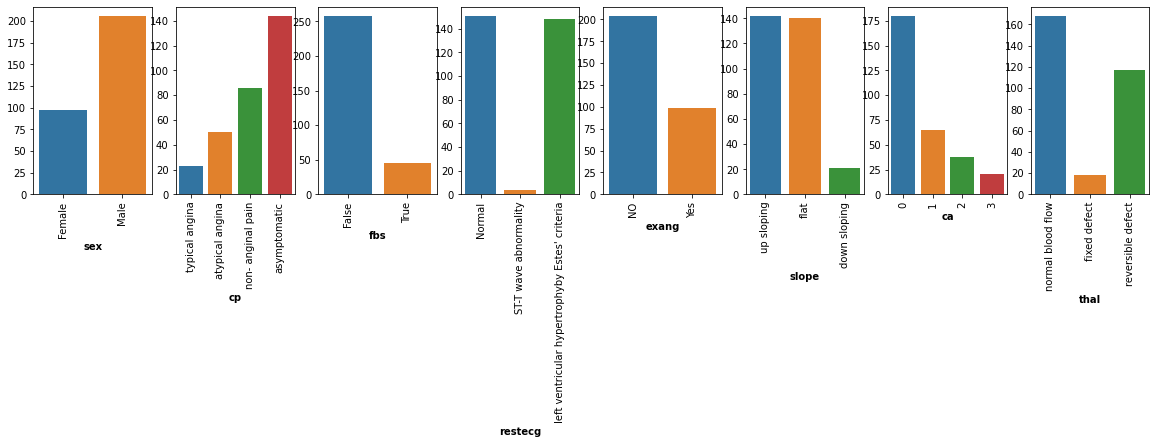

In [189]:

f = plt.figure(figsize=(20,20))
index = 1
data_mapping = {'sex':{0: "Female",1: "Male"},
                'cp':{0:"typical angina", 1 :"atypical angina", 2: "non- anginal pain", 3: "asymptomatic"},
                'fbs':{ 0 :"False",1:"True"},
                'restecg':{0 :"Normal", 1: "ST-T wave abnormality",2:"left ventricular hypertrophyby Estes' criteria"},
                'exang':{0:"NO", 1:"Yes"},
                'slope':{0: "up sloping", 1: "flat", 2: "down sloping"},
                'ca': {0:0,1:1,2:2,3:3},
                'thal':{0: "NULL", 1: "normal blood flow" ,2: "fixed defect" ,
                        3: "reversible defect" }
               }                                    
for col in cols :
    
    ax = f.add_subplot(5,8,index)
    plt.ticklabel_format(style='plain')
    sns.countplot(df[col].map(data_mapping[col]),ax = ax)      
    plt.xlabel(col,fontweight='bold')
    plt.ylabel('',fontweight='bold')
    plt.xticks(rotation = 90)
    index = index +1
    
plt.show()    

We can see that for the given training dataset
1. Male constitutes of 67.98% (204) while Female constitutes of 32.01% (97)
2. Around 47.52% of people have asymptomatic (no chest pain) while 28.3% people have non-anginal pain, 16.5% people have atypical angina & 7.59% people have typical angina
3. Around 14.85% people have blood sugar levels > 120 mg/dl 
4. 49.8% people have Normal ECG while 1.3% have ST-T wave abnormality & 49.8 have left ventricular hypertrophyby Estes' criteria
5. 32.67% people have agina (pain) from exercise 
6. 55.44% people have normal blood flow, 5.9% have fixed defect & 38.61% have reversible defect
7. The minimum age of patients is 29 years while the maximum age is 77 for the given dataset

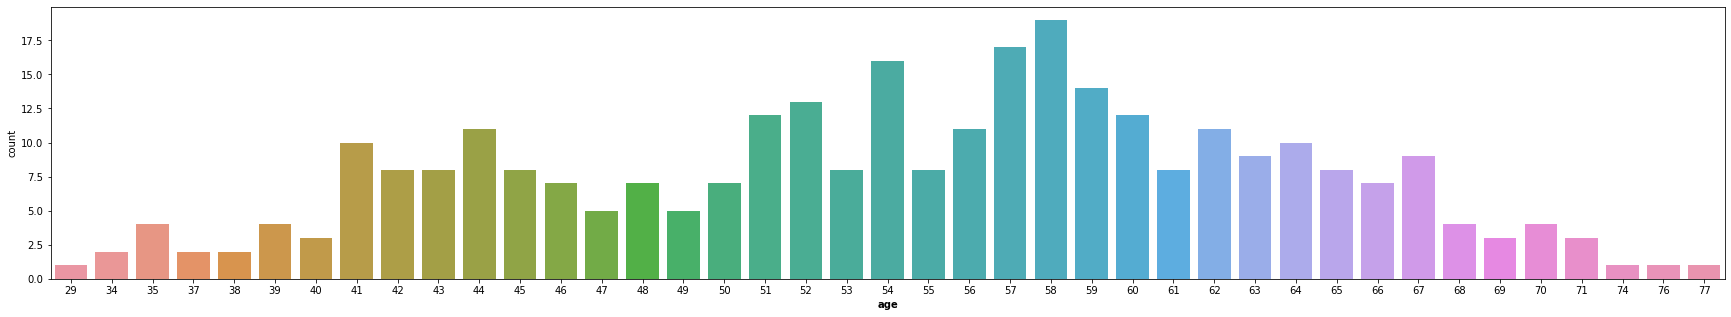

In [341]:
plt.figure(figsize=(30,5))
sns.countplot(df['age'])
plt.xlabel('age',fontweight='bold')
plt.show()

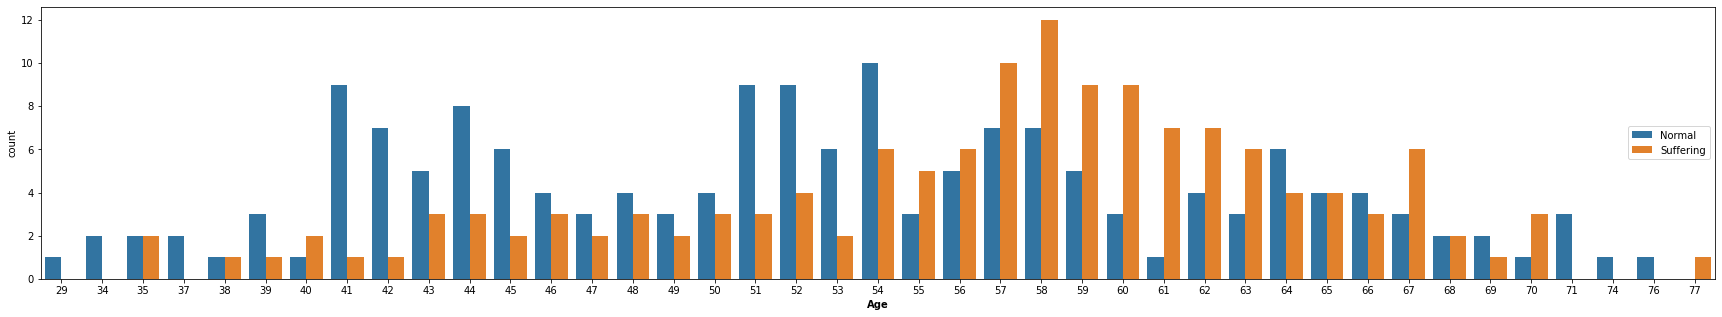

In [342]:
plt.figure(figsize=(30,5))
legend = sns.countplot(data=df,x='age',hue='target')
plt.xlabel('Age',fontweight='bold')
plt.legend(['Normal','Suffering'])
sns.move_legend(legend,"right")
plt.show()

Text(0.5, 1.0, 'Patients Suffering from heart disease')

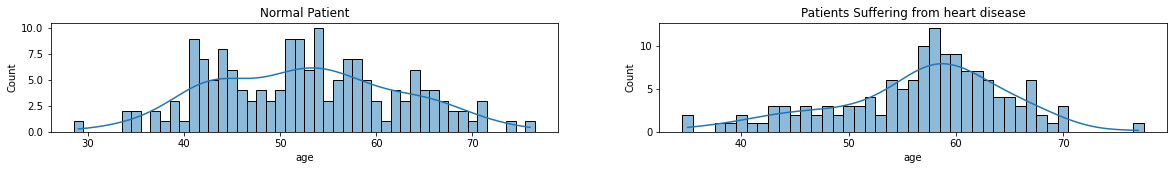

In [462]:
gg = df.groupby('target')
f = plt.figure(figsize=(20,2))

ax = f.add_subplot(1,2,1)
sns.histplot(gg.get_group(0)['age'],kde=True)
plt.title('Normal Patient')
plt.ticklabel_format(style='plain')
ax = f.add_subplot(1,2,2)
sns.histplot(gg.get_group(1)['age'],kde=True)
plt.title('Patients Suffering from heart disease')


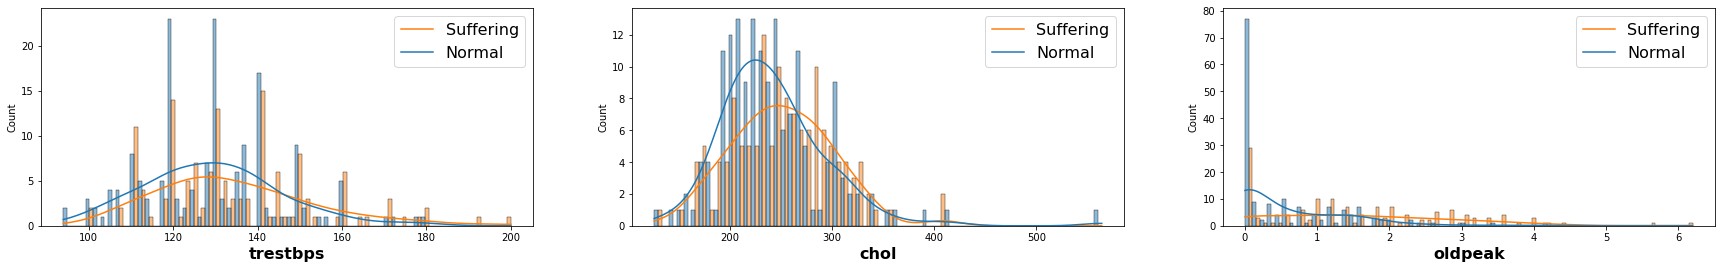

In [381]:
cols = ['trestbps','chol','oldpeak']
colors = ['skyblue','red','yellow']
f = plt.figure(figsize=(30,4))
index = 1
for col in cols:
    plt.subplot(1,3,index)
    plt.ticklabel_format(style='plain')
    sns.histplot(data=df,x = col,color=colors[index-1],bins = 60,kde=True,hue='target',multiple='dodge')
    plt.xlabel(col,fontweight='bold',fontsize = 16)
    plt.legend(['Suffering','Normal'],fontsize = 16)
    index=index+1


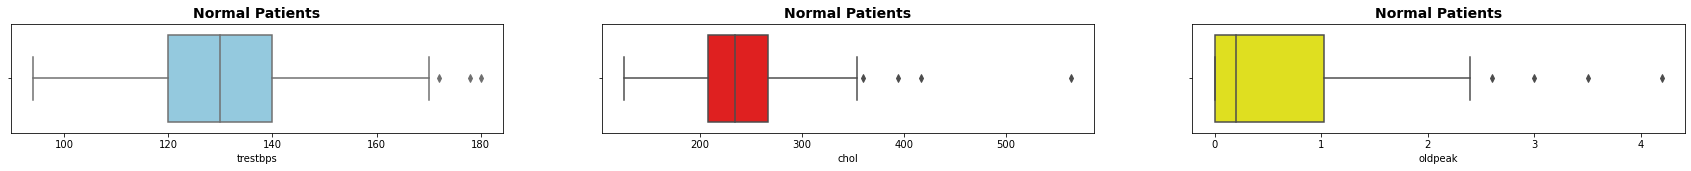

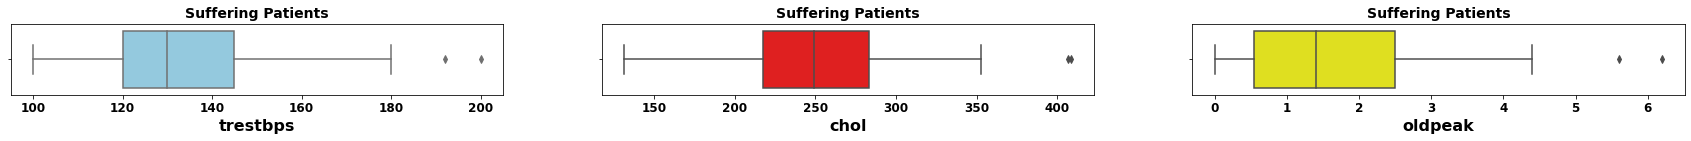

In [360]:
cols = ['trestbps','chol','oldpeak']
colors = ['skyblue','red','yellow']
index = 1
f1 = plt.figure(figsize=(30,2))
f2 = plt.figure(figsize=(30,6))

for col in cols:
    ax1 = f1.add_subplot(1,3,index)
    ax2 = f2.add_subplot(4,3,index)
    ax1.set_title('Normal Patients',fontsize = 14,fontweight ="bold")    
    ax2.set_title('Suffering Patients',fontsize = 14,fontweight ="bold")    
    sns.boxplot(ax=ax1,data=gdf.get_group(0),x=col,color=colors[index-1])
    sns.boxplot(ax=ax2,data=gdf.get_group(1),x=col,color=colors[index-1])
    plt.xlabel(col,fontweight='bold',fontsize = 16)
    plt.xticks(fontweight='bold',fontsize = 12)
    index=index+1

plt.show()


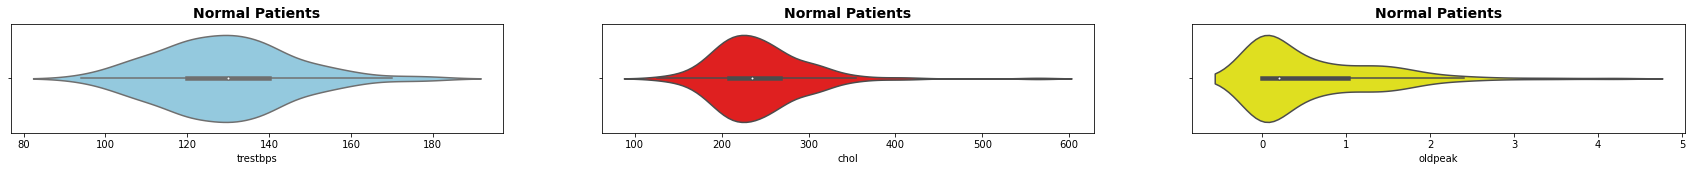

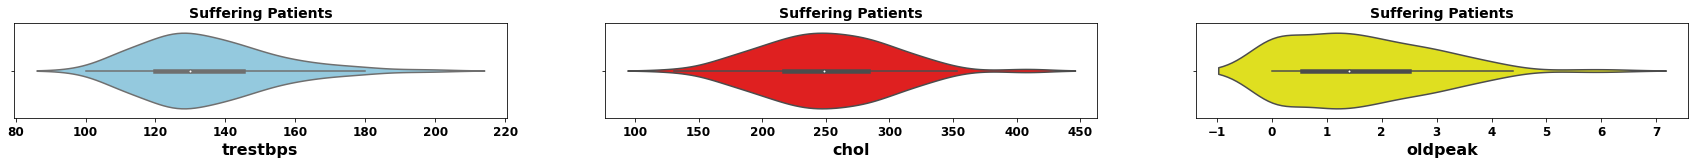

In [362]:
cols = ['trestbps','chol','oldpeak']
colors = ['skyblue','red','yellow']
index = 1
f1 = plt.figure(figsize=(30,2))
f2 = plt.figure(figsize=(30,8))

for col in cols:
    ax1 = f1.add_subplot(1,3,index)
    ax2 = f2.add_subplot(4,3,index)
    ax1.set_title('Normal Patients',fontsize = 14,fontweight ="bold")    
    ax2.set_title('Suffering Patients',fontsize = 14,fontweight ="bold")    
    sns.violinplot(ax=ax1,data=gdf.get_group(0),x=col,color=colors[index-1])
    sns.violinplot(ax=ax2,data=gdf.get_group(1),x=col,color=colors[index-1])
    plt.xlabel(col,fontweight='bold',fontsize = 16)
    plt.xticks(fontweight='bold',fontsize = 12)
    index=index+1

plt.show()


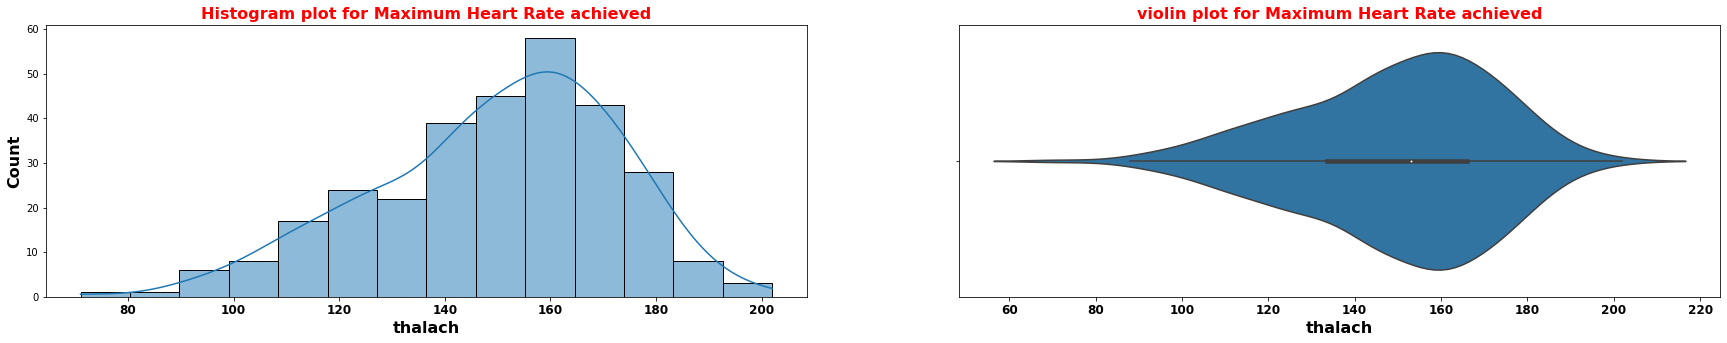

In [421]:
f = plt.figure(figsize=(30,5))
ax = f.add_subplot(1,2,1)
sns.histplot(df['thalach'],kde =True,ax=ax)
plt.title("Histogram plot for Maximum Heart Rate achieved",fontweight='bold',fontsize = 16,color='red')
plt.xlabel("thalach",fontweight='bold',fontsize = 16)
plt.ylabel('Count',fontweight='bold',fontsize = 16)
plt.xticks(fontweight='bold',fontsize = 12)

ax = f.add_subplot(1,2,2)
sns.violinplot(df['thalach'],kde =True,ax=ax)
plt.xlabel("thalach",fontweight='bold',fontsize = 16)
plt.title("violin plot for Maximum Heart Rate achieved",fontweight='bold',fontsize = 16,color='red')
plt.xticks(fontweight='bold',fontsize = 12)
plt.show()



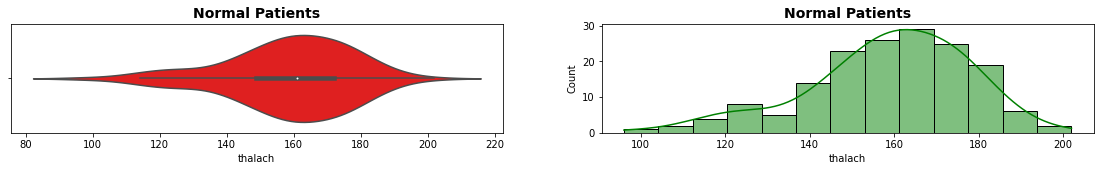

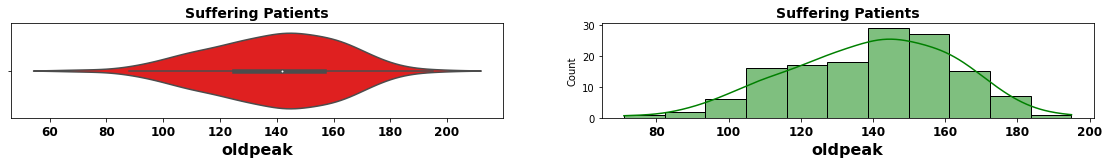

In [425]:

colors = ['skyblue','red','yellow']
index = 1
f1 = plt.figure(figsize=(30,2))
f2 = plt.figure(figsize=(30,8))

ax1 = f1.add_subplot(1,3,1)
ax2 = f2.add_subplot(4,3,1)
ax1.set_title('Normal Patients',fontsize = 14,fontweight ="bold")    
ax2.set_title('Suffering Patients',fontsize = 14,fontweight ="bold")    
sns.violinplot(ax=ax1,data=gdf.get_group(0),x="thalach",color='red')
sns.violinplot(ax=ax2,data=gdf.get_group(1),x="thalach",color='red')
plt.xlabel(col,fontweight='bold',fontsize = 16)
plt.xticks(fontweight='bold',fontsize = 12)


ax1 = f1.add_subplot(1,3,2)
ax2 = f2.add_subplot(4,3,2)
ax1.set_title('Normal Patients',fontsize = 14,fontweight ="bold")    
ax2.set_title('Suffering Patients',fontsize = 14,fontweight ="bold")    
sns.histplot(ax=ax1,data=gdf.get_group(0),x="thalach",color='green',kde=True)
sns.histplot(ax=ax2,data=gdf.get_group(1),x="thalach",color='green',kde=True)
plt.xlabel(col,fontweight='bold',fontsize = 16)
plt.xticks(fontweight='bold',fontsize = 12)

plt.show()


In [366]:
gdf.get_group(0).describe()

,trestbps,chol,thalach,oldpeak,target
count,164.000000,164.000000,164.000000,164.000000,164.0
mean,129.250000,242.640244,158.378049,0.586585,0.0
std,16.204739,53.456580,19.199080,0.781734,0.0
min,94.000000,126.000000,96.000000,0.000000,0.0
25%,120.000000,208.750000,148.750000,0.000000,0.0
50%,130.000000,234.500000,161.000000,0.200000,0.0
75%,140.000000,267.250000,172.000000,1.025000,0.0
max,180.000000,564.000000,202.000000,4.200000,0.0




------------------------------------------------------------------------------------------------------------------
 STATISTICS  &nbsp;&nbsp;&nbsp;&nbsp;Normal&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Suffering
--------------------------------------------------------------------------------------------------------------
                  trestbps  chol oldpeak  thalach        | trestbps  chol oldpeak thalach 
-------------------------------------------------------------------------------------------------------------
     
     count          164                                    139
     
     Min            94       126    0	    96            100     131	  0      71
     Max            180      564    4.2     202            200    409     6.2    195
     Median         130      234.5  0.2     161.0          130    249     1.4    142
     Mean           129.25   242.64 0.58    158.37         134.56 251.47  1.57    139.25               
-----------------------------------------------------------------------------------------------




1. One observation we can see is that the maximum & minimum value of Maximum Heart rate achieved is high in Normal Patients when compared to Suffering patients.
2. The highest value of Serum cholesterol is seen for Normal Patients
3. Highest Blood Pressure during rest is observed in suffering patients
4. The oldpeak value is 0 for 32% (99 samples) of data in which 24.1% (73 samples) are Normal patients & 8.5%(26) are Sufferning patients 

In [409]:
(df[df['oldpeak']==0.0]['target']).value_counts()

0    73
1    26
Name: target, dtype: int64

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    category
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(9), float64(1), int64(4)
memory usage: 17.1 KB


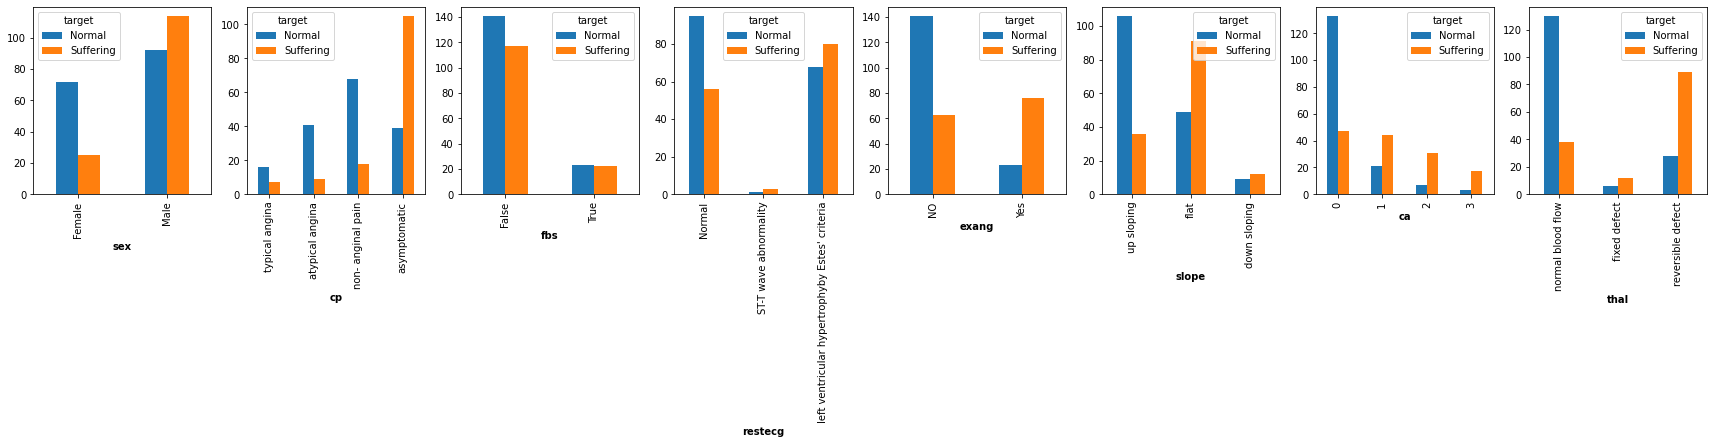

In [459]:
f = plt.figure(figsize=(20,20))
index = 1
cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']


for col in cols :
    
    ax = f.add_subplot(5,8,index)
    CrosstabResult=pd.crosstab(index=df[col].map(data_mapping[col]),columns=df['target'].map({0:"Normal", 1:"Suffering"}))
    CrosstabResult.plot.bar(figsize=(30,20), rot=0,ax=ax)
    plt.xlabel(col,fontweight='bold')
    plt.ylabel('',fontweight='bold')
    plt.xticks(rotation = 90)
    index = index +1
    


1. We observere that most of the Female patients are Normal & most of the male patients are Suffering
2. Assymptotic chest pain is observed highly in most of the suffering patients while non- anginal pain is highly observed in Normal patients
3. Normal patients count is high for Blood sugar levels on fasting for lessthan & greater than 120mg/dl
4. Most of Sufferning patients have agina induced by exercise.
5. Most of Normal have 0 number of major vessels 
6. Normal blood flow is seen common in normal patients where as reversible defect is oberserved common in most of suffering patients


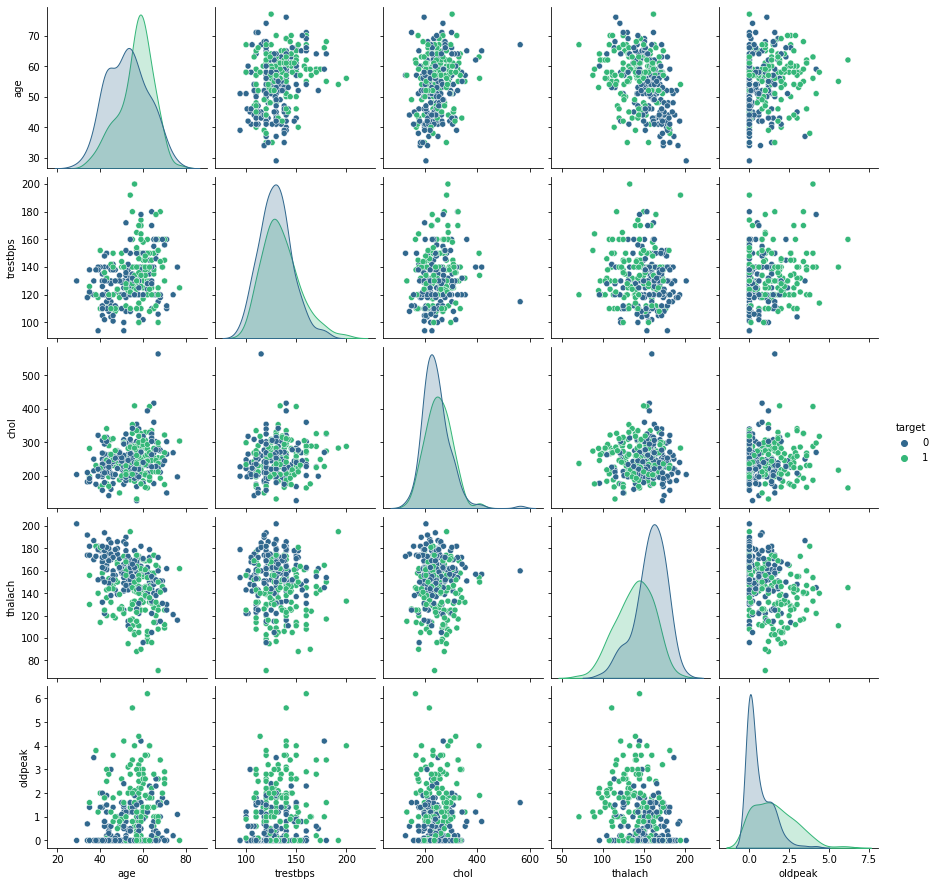

In [494]:
sns.pairplot(df, hue = 'target', palette ='viridis')
plt.show()

In [491]:
data_X = df.iloc[:,:-1]
data_Y = df.iloc[:,-1]

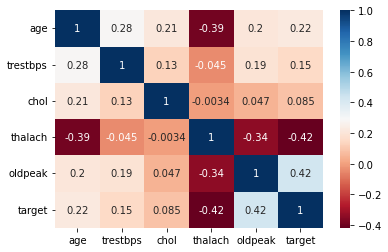

In [495]:

sns.heatmap(data_X.join(data_Y).corr(method='pearson'), annot = True, cmap="RdBu")
plt.show()

1. We can see that oldpeak(Exercise induced ST-depression in relative with the state of rest) is correlated with our target variable followed by Age variable.
2. Maximum heart rate achieved is negatively correlated with the target variable
3. thalach(maximum heart rate achieved) is negatively correlated to all the variables (dependent & independent)

<AxesSubplot:xlabel='thalach', ylabel='oldpeak'>

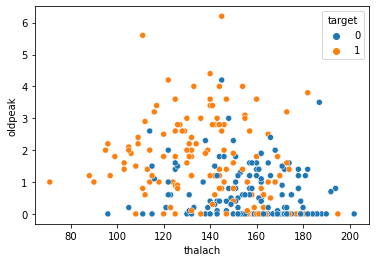

In [510]:
sns.scatterplot(data=df,x='thalach',y='oldpeak',hue='target')

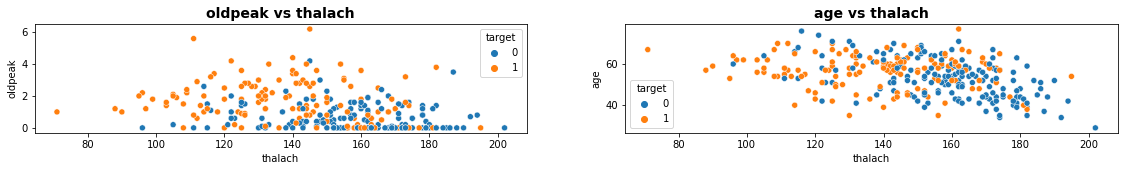

In [523]:
f1 = plt.figure(figsize=(30,2))

ax1 = f1.add_subplot(1,3,1)
ax2 = f1.add_subplot(1,3,2)
ax1.set_title('oldpeak vs thalach',fontsize = 14,fontweight ="bold")    
ax2.set_title('age vs thalach',fontsize = 14,fontweight ="bold")    
sns.scatterplot(data=df,x='thalach',y='oldpeak',hue='target',ax=ax1)
sns.scatterplot(data=df,x='thalach',y='age',hue='target',ax=ax2)
plt.show()

###  Checking for the Multicollinearity using Variation Inflation Factor (VIF)

Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.



In [525]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["variables"] = data_X.columns
vif["VIF"] = [variance_inflation_factor(data_X.values, i) for i in range(data_X.shape[1])]
vif


,variables,VIF
0,age,41.032316
1,sex,3.794734
2,cp,7.256836
3,trestbps,59.878636
4,chol,26.334382
5,fbs,1.247557
6,restecg,2.156532
7,thalach,34.769491
8,exang,2.041839
9,oldpeak,3.171225


We observe that Age, trestbps, thalach & chol have high VIF which indicates high multicollinearty between this independent variable & others

In [526]:
df2 = data_X.copy()
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1


In [528]:
# Fixing the multicollinearity

df2['Age_at_joining'] = df.apply(lambda x: x['age'] - x['trestbps'],axis=1)
X = df2.drop(['age','trestbps'],axis=1)

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,variables,VIF
0,sex,3.792551
1,cp,7.067539
2,chol,22.002758
3,fbs,1.241513
4,restecg,2.149965
5,thalach,30.485575
6,exang,2.041835
7,oldpeak,3.168054
8,slope,3.066151
9,ca,1.900213


In [529]:
X_train, X_test, y_train, y_test  = train_test_split(data_X,data_Y,test_size=0.33, random_state=42)

In [533]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(scaled_data_X)


[[ 0.28191457  0.72547625  0.91736526 ...  0.66230076  0.41967819
   0.2020644 ]
 [-0.69728298  0.72547625 -1.11788226 ...  2.26286093 -0.70130434
   1.25383552]
 [ 0.17311484 -1.37840488  0.91736526 ...  2.26286093  1.54066071
   1.25383552]
 ...
 [ 0.49951402  0.72547625  0.91736526 ... -0.93825941  0.41967819
   1.25383552]
 [ 0.71711348  0.72547625  0.91736526 ... -0.93825941  0.41967819
   1.25383552]
 [ 0.28191457 -1.37840488  0.91736526 ... -0.93825941  0.41967819
  -0.84970672]]


In [534]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = data_X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = data_X.columns)

X_train_scaled.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.281915,0.725476,0.917365,0.953697,0.644492,-0.374766,1.032555,-1.786394,1.393567,-0.343734,0.662301,0.419678,0.202064
1,-0.697283,0.725476,-1.117882,-1.201011,-0.351959,-0.374766,-0.973270,0.782579,-0.717583,-0.013424,2.262861,-0.701304,1.253836
2,0.173115,-1.378405,0.917365,3.647083,0.898905,2.668333,1.032555,-0.823029,1.393567,2.463898,2.262861,1.540661,1.253836
3,0.064315,-1.378405,-1.117882,-0.015921,2.043764,-0.374766,-0.973270,0.690830,-0.717583,0.151731,-0.938259,-0.701304,-0.849707
4,1.805111,-1.378405,0.917365,-1.093276,-2.048046,-0.374766,-0.973270,-1.190026,-0.717583,0.482041,0.662301,-0.701304,-0.849707


In [557]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LogisticR_model = LogisticRegression(penalty='l2',fit_intercept=True,C=1)
LogisticR_model.fit(X_train_scaled,y_train)



LogisticRegression(C=1)

In [558]:
# Lets find the predictions on the test dataset
y_Pred = LogisticR_model.predict(X_test_scaled)
y_Pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [559]:
LogisticR_model.coef_

array([[-0.05620905,  0.72112608,  0.4887362 ,  0.3287743 ,  0.29795028,
        -0.14351295,  0.02811332, -0.40983918,  0.47854743,  0.05517798,
         0.39785837,  1.32832626,  0.56477367]])

<AxesSubplot:>

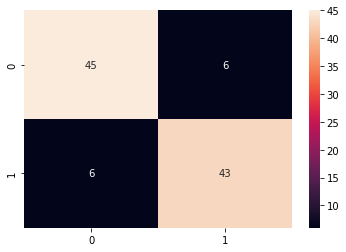

In [560]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
CM = confusion_matrix(y_test, y_Pred)

sns.heatmap(CM, annot=True)


In [561]:
accuracy_score(y_test, y_Pred)

0.88

In [562]:
f1_score(y_test, y_Pred)

0.8775510204081631

# log-loss

Logarithmic loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. The goal of our machine learning models is to minimize this value. A perfect model would have a log loss of 0. Log loss increases as the predicted probability diverges from the actual label. 



In [550]:
from sklearn.metrics import log_loss
log_loss(y_test, y_Pred)

4.144701143235094

In [552]:
tuned_parameters = [{'C' :[10**-4,10**-3,10**-2,10**-2,10**2,10**3,10**4]}]  

model = GridSearchCV(LogisticRegression(),tuned_parameters,scoring='f1')
model.fit(X_train_scaled,y_train)
model.best_estimator_





LogisticRegression(C=100)

In [563]:
model.score(X_test_scaled,y_test)

0.8775510204081631

In [582]:
LogisticR_model = LogisticRegression(penalty='l1',fit_intercept=True,C=1000,solver='liblinear')
LogisticR_model.fit(X_train_scaled,y_train)
coef = LogisticR_model.coef_
print(np.count_nonzero(coef))


13


In [583]:
coef

array([[-0.1069957 ,  0.80448264,  0.51883816,  0.38479684,  0.34096768,
        -0.17263366,  0.01247643, -0.45617704,  0.50972726, -0.01303275,
         0.46672293,  1.5015097 ,  0.5827561 ]])

In [577]:
y_Pred = LogisticR_model.predict(X_test_scaled)
f1_score(y_test, y_Pred)


0.8775510204081631

<AxesSubplot:>

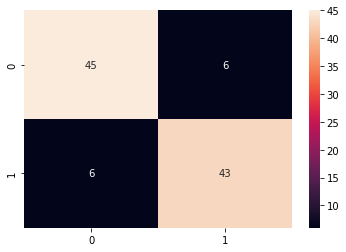

In [576]:
CM = confusion_matrix(y_test, y_Pred)
sns.heatmap(CM, annot=True)


In [578]:
LogisticR_model = LogisticRegression(penalty='l1',fit_intercept=True,C=0.1,solver='liblinear')
LogisticR_model.fit(X_train_scaled,y_train)
coef = LogisticR_model.coef_
print(np.count_nonzero(coef))


8


In [580]:
coef

array([[ 0.        ,  0.19759075,  0.21701803,  0.        ,  0.        ,
         0.        ,  0.        , -0.18491493,  0.32003309,  0.07913179,
         0.07393152,  0.81037593,  0.49558941]])

We can see that as the value of C decreases ( 'lambda' increases) , more sparcity

## Lets check on the dataframe df2 where we have joined columns to reduce Multi collinearity

In [586]:
X_train, X_test, y_train, y_test  = train_test_split(X,data_Y,test_size=0.33, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
model = GridSearchCV(LogisticRegression(),tuned_parameters,scoring='f1')
model.fit(X_train_scaled,y_train)
model.best_estimator_



LogisticRegression(C=0.01)

In [587]:
model.score(X_test_scaled,y_test)

0.7954545454545455

In [588]:
LogisticR_model = LogisticRegression(penalty='l1',fit_intercept=True,C=1000,solver='liblinear')
LogisticR_model.fit(X_train_scaled,y_train)
coef = LogisticR_model.coef_
print(np.count_nonzero(coef))


12


In [590]:
y_Pred = LogisticR_model.predict(X_test_scaled)
f1_score(y_test, y_Pred)


0.8865979381443299

<AxesSubplot:>

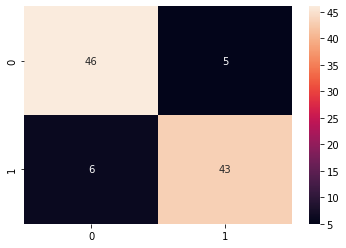

In [593]:
CM = confusion_matrix(y_test, y_Pred)
sns.heatmap(CM, annot=True)


We see that there is a slight increase in the f1 score for the dataset where Variance has been reduced

In [594]:
log_loss(y_test, y_Pred)

3.799305383311686

In [595]:
# Predicts the probabilities. Choose the class with the highest probability
LogisticR_model.predict_proba(X_test)[0:10]

array([[2.22044605e-16, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [3.05799830e-12, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [7.77156117e-15, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [8.88178420e-16, 1.00000000e+00],
       [4.44089210e-16, 1.00000000e+00]])

In [596]:
y_Pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])